In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload

%autoreload 2

In [3]:
def imshow(image: np.array, cmap=None):
    plt.imshow(image, cmap=cmap)
    plt.show()

<class 'numpy.ndarray'>


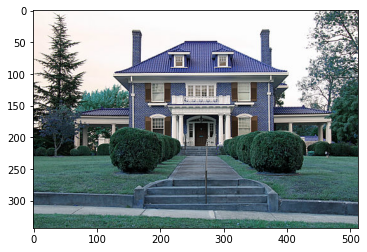

In [8]:
from modules.sharpening import sharpenHandler

def cornerDetectionHandler(image: np.array, params: dict) -> np.array:
    """Corner Detection Handler

    Args:
        image(np.array): image to change
         params (dict): params has { kernel_size: int (odd, [1, 3, 5, 7, 9, 11]), sharpen_strength: float ([0 - 10], step size of 0.5)}

    Returns:
        np.array: Image with corners
    """

    if 'sharpen_strength' not in params or 'kernel_size' not in params :
        return image

    if params['sharpen_strength'] > 10 :
        params['sharpen_strength'] = 10
    elif  params['sharpen_strength'] < 0 :
        params['sharpen_strength'] = 0

    params['kernel_size'] = round(params['kernel_size'])
    # params['kernel_size'] += 1 if params['kernel_size'] % 2 == 1 else 0

    new_img = cornerDetect(image, params['kernel_size'], float(params['sharpen_strength']))
    return new_img


def cornerDetect(image: np.array, kernel_size: int, strength: float) -> np.array:
    """Detect corners in the image

    Args:
        image (np.array): image to change

    Returns:
        np.array: corners in image
    """
    #Make copy to display corners
    retImg = image.copy()
    
    image = cv2.bilateralFilter(image, 9 ,75, 75)
    
    # Sharpen The Image
    sharpened_img = sharpenHandler(image, {'kernel_size': kernel_size, 'strength': strength})

    # Find Corners
    gray = cv2.cvtColor(sharpened_img, cv2.COLOR_BGR2GRAY)
    gray = np.float32(gray)
    dst = cv2.cornerHarris(gray, 2, 3, 0.04)
    dst = cv2.dilate(dst, None)
    thresh = 0.01 * dst.max()
    # Display Corners
    arr = (dst > thresh).nonzero()

    for j in range(0, len(arr[0])):
        cv2.circle(retImg, (arr[1][j], arr[0][j]), 1, (0, 255, 0), -1)

    return retImg


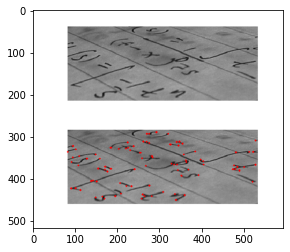

In [9]:
image = cv2.imread('../data/images/Corner.png')
imshow(image[:,:,::-1])

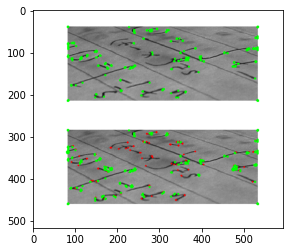

In [10]:
corner = cornerDetectionHandler(image, {'sharpen_strength': 1, 'kernel_size': 3})
imshow(corner[:,:,::-1])

In [7]:
cv2.imwrite('corner.png', corner)

True